<a href="https://colab.research.google.com/github/quetion/Crypto_fin/blob/main/%5BCryptofin%5DHello_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python的基礎操作
- 列印
- 變數型態 (字串/數值)
- 迴圈概念
- 四則運算/向量運算

In [ ]:
# Print Hello, world.
print('Hello, world.')

Hello, world.


In [ ]:
# Print number, float
a = 2**(0.5)
print(a)
print('{}'.format(a))
print('{:.2f}'.format(a))

1.4142135623730951
1.4142135623730951
1.41


In [ ]:
# print 1,2, ...,20
for i in range(20):
  print(i)

In [ ]:
# sum of the series, 1,2,...,20
total = 0
for i in range(1,21):
  total = total +i
print(total)

210


In [ ]:
# import the package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# sum of the series via numpy package
arr = np.arange(1,21)
arr.sum()

210

In [ ]:
# calculate the return
p0 = 100
p1 = 150
ret = (p1-p0)/p0
ret = ret*100
print('報酬率: {}%'.format(ret))
print('年化報酬率: {}%'.format(ret*12))


報酬率: 50.0%
年化報酬率: 600.0%


# 如何獲取加密貨幣的交易資料
- 以比特幣為例
- 利用yfinance套件
- 資料型態 (dataframe)
- 資料整理

In [ ]:
# 如何獲取加密貨幣資料
# 1.安裝套件
!pip install yfinance

In [ ]:
# 2.匯入必要套件
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
# 3.下載資料(yahoo finance https://finance.yahoo.com/)
data = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# 4. 查看資料
data.head()
data.tail()
data.info()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
# 5. 選取資料期間: 從2020到現在
test = data['2020':]
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1357 entries, 2020-01-01 to 2023-09-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1357 non-null   float64
 1   High       1357 non-null   float64
 2   Low        1357 non-null   float64
 3   Close      1357 non-null   float64
 4   Adj Close  1357 non-null   float64
 5   Volume     1357 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 74.2 KB


In [ ]:
# 6. 選取資料變數
test = test[['High','Low','Adj Close']]
test.head()

In [ ]:
# 7. 重新命名變數
test.columns = ['high_btc','low_btc','price_btc']

In [ ]:
# 8. 建立每日報酬率
test['ret_btc'] = test.price_btc.pct_change()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1357 entries, 2020-01-01 to 2023-09-20
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   high_btc   1357 non-null   float64
 1   low_btc    1357 non-null   float64
 2   price_btc  1357 non-null   float64
 3   ret_btc    1356 non-null   float64
dtypes: float64(4)
memory usage: 53.0 KB


In [ ]:
# 9. 建立每日高低價差
# 10. 計算報酬率的平均值
# 11. 計算報酬率的標準差

## 小結
- 我們可以輕易地利用Python協助我們下載並分析加密貨幣的資料

## 練習題 (HW1)
1. 利用套件yfinance下載比特幣交易資料，其中包含，期間為`2019/01/01 - 2023/8/31`
2. 利用此資料的收盤價計算出比特幣報酬率
3. 根據上題的報酬率結果,計算其平均報酬率,標準差, 最大,最小等統計量 (註:需年化調整)
4. 利用上述步驟,計算S&P500指數報酬的各項統計量
5. 比較比特幣與S&P500指數的績效表現


In [1]:
#0 import package
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:
#1 download data from yahoo-finance
data = yf.download('BTC-USD')
data = data['2019':'2023-08']
data.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1704 entries, 2019-01-01 to 2023-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1704 non-null   float64
 1   High       1704 non-null   float64
 2   Low        1704 non-null   float64
 3   Close      1704 non-null   float64
 4   Adj Close  1704 non-null   float64
 5   Volume     1704 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 93.2 KB


In [6]:
#2 利用收盤價計算出比特幣報酬率
data = data[['Adj Close']]
data.columns = ['price_btc']
data['ret_btc'] = data.price_btc.pct_change()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1704 entries, 2019-01-01 to 2023-08-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_btc  1704 non-null   float64
 1   ret_btc    1703 non-null   float64
dtypes: float64(2)
memory usage: 39.9 KB


<Axes: xlabel='Date'>

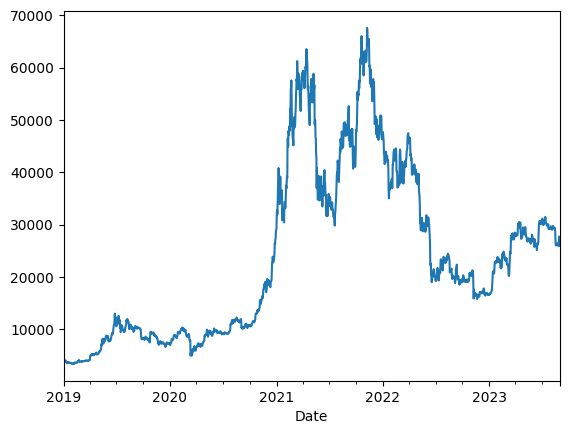

In [5]:
data['Adj Close'].plot()

In [ ]:
#3 計算其平均報酬率,標準差, 最大,最小等統計量
